In [1]:
import numpy as np
from sklearn import datasets
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 6)

## Linear SVM Classification

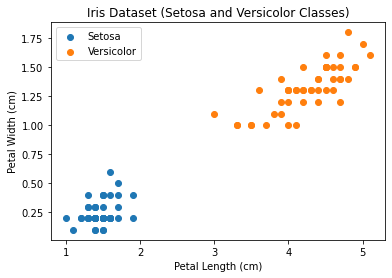

In [2]:
from sklearn.svm import SVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

# select only setosa and varsicolor classes
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# Plot the dataset
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Setosa")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Versicolor")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend()
plt.title("Iris Dataset (Setosa and Versicolor Classes)")
plt.show()

#### Fundamental idea behind SVMs is best explained with some visuals. Let's compare some bad decision boundaries with SVM to understand the importance of underlying algorithm

In [3]:
x0 = np.linspace(0, 5.5, 200)
pred_1 = -5 * x0 + 15.5		# model 1
pred_2 = x0 - 1.8    		# model 2
pred_3 = 0.1 * x0 + 0.5     # model 3
pred_4 = 5 * x0 - 23  # model 4

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=1e9)
svm_clf.fit(X, y)

SVC(C=1000000000.0, kernel='linear')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


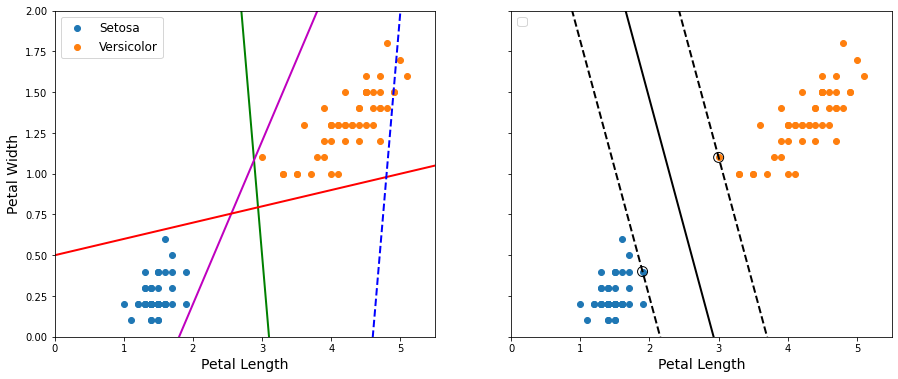

In [4]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6), sharey=True)

plt.sca(axes[0])

# Plot data points with customized colors and markers
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Setosa")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Versicolor")

# Plot all three bad models
plt.plot(x0, pred_1, "g-", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(x0, pred_4, "b--", linewidth=2)

plt.xlabel("Petal Length", fontsize=14)
plt.ylabel("Petal Width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.axis([0, 5.5, 0, 2])

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1 / w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=100, facecolors='none', edgecolors='k')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.sca(axes[1])
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1])
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1])

plot_svc_decision_boundary(svm_clf, 0, 5.5)

plt.xlabel("Petal Length", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.axis([0, 5.5, 0, 2])

plt.show()

### Why is SVM a better model? (Hint: Think of generalization)

You can think of an SVM classifier as fitting the widest possible street (represented by the parallel dashed lines) between the classes. 

Notice that adding more training instances “off the street” will not affect the decision boundary at all: it is fully determined (or “supported”) by the instances located on the edge of the street. These instances are called the **support vectors**.

### SVMs are sensitive to feature scales (why?)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


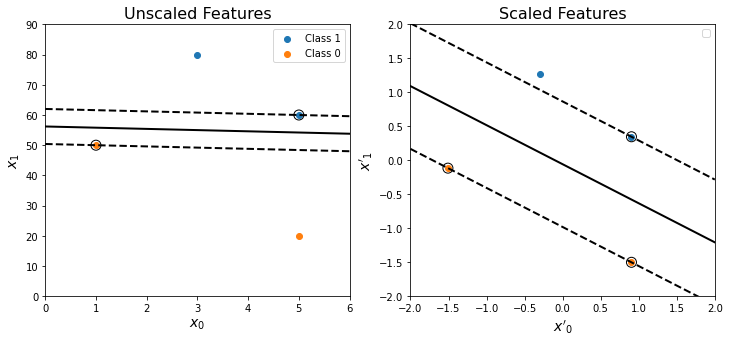

In [5]:
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=10**9)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(12, 5))

# The first subplot visualizes boundaries learned from unscaled features
plt.subplot(121)
plt.scatter(Xs[:, 0][ys == 1], Xs[:, 1][ys == 1], label="Class 1")
plt.scatter(Xs[:, 0][ys == 0], Xs[:, 1][ys == 0], label="Class 0")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=14)
plt.ylabel("$x_1$", fontsize=14)
plt.title("Unscaled Features", fontsize=16)
plt.legend()
plt.axis([0, 6, 0, 90])

# The second subplot visualizes boundaries learned from scaled features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.scatter(X_scaled[:, 0][ys == 1], X_scaled[:, 1][ys == 1])
plt.scatter(X_scaled[:, 0][ys == 0], X_scaled[:, 1][ys == 0])
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x'_0$", fontsize=14)
plt.ylabel("$x'_1$", fontsize=14)
plt.title("Scaled Features", fontsize=16)
plt.legend()
plt.axis([-2, 2, -2, 2])

plt.show()

### Issues with Hard Margin Classification 
1. What happens when there are outliers?
2. What if data is not linearly separable?

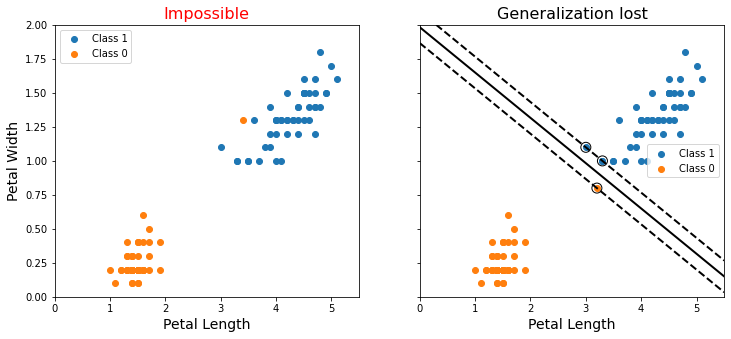

In [6]:
# Adding some outliers to the dataset
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)

plt.sca(axes[0])
plt.scatter(Xo1[:, 0][yo1 == 1], Xo1[:, 1][yo1 == 1], label="Class 1")
plt.scatter(Xo1[:, 0][yo1 == 0], Xo1[:, 1][yo1 == 0], label="Class 0")
# plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal Length", fontsize=14)
plt.ylabel("Petal Width", fontsize=14)
plt.title("Impossible", color="r", fontsize=16)
plt.legend()
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.scatter(Xo2[:, 0][yo2 == 1], Xo2[:, 1][yo2 == 1], label="Class 1")
plt.scatter(Xo2[:, 0][yo2 == 0], Xo2[:, 1][yo2 == 0], label="Class 0")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal Length", fontsize=14)
plt.title("Generalization lost", fontsize=16)
plt.legend()
plt.axis([0, 5.5, 0, 2])

plt.show()

1. In the left plot, it's impossible to find a hard margin.
2. In the right plot, the decision boundary is very different from before, and it will not generalize well.

### Soft Margin Classification

We need to use a more flexible model with a good balance between keeping the street as large as possible and
limiting the margin violations (i.e., instances that end up in the middle of the
street or even on the wrong side). This is called soft margin classification.

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

#### Regularization Hyperparameter C 
- Large C - Harder Margins
- Low C - Softer Margins


In [8]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

# What is a pipeline? What's the difference between transformers and classifiers?
scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

/home/gandalf/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [9]:
svm_clf.predict([[5.5, 1.7]])

array([1])

LinearSVC does not provide us with support vectors. We need to find them manually.

- How is SVC(kernel="linear") different from LinearSVC?

In [10]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])

w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

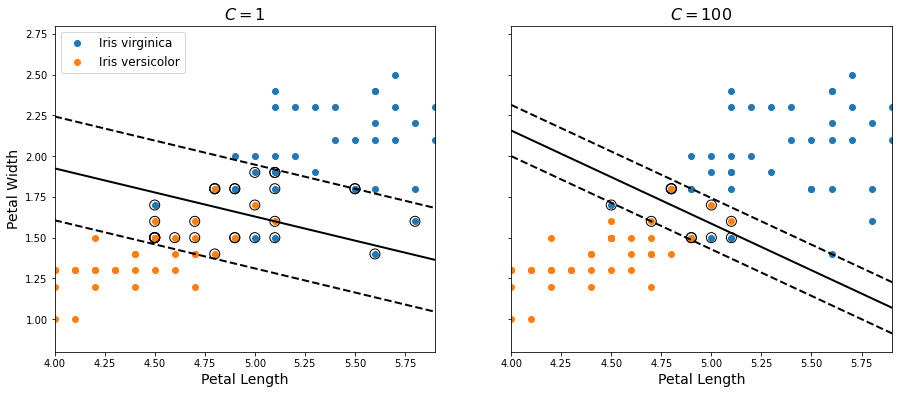

In [11]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6), sharey=True)

plt.sca(axes[0])
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], label="Iris virginica")
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal Length", fontsize=14)
plt.ylabel("Petal Width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], label="Iris virginica")
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], label="Iris versicolor")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal Length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.show()

- Reducing C makes the street larger, but it also leads to more margin violations. Less risk of overfitting.
- But if we reduce it too much, it will underfit.


### Support Vector Regression

To use SVMs for regression instead of classification, the trick is to tweak the objective: instead of trying to fit the largest possible street between two classes while limiting margin violations, SVM regression tries to fit as many instances as possible on the street while limiting margin violations (i.e., instances off the street).

The width of the street is controlled by a hyperparameter, ϵ.

In [12]:
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline

# Generate a simple linear dataset
np.random.seed(42)
X = 2 * np.random.rand(50, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(50)

svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon=0.5, random_state=42))
svm_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=0.5, random_state=42))])

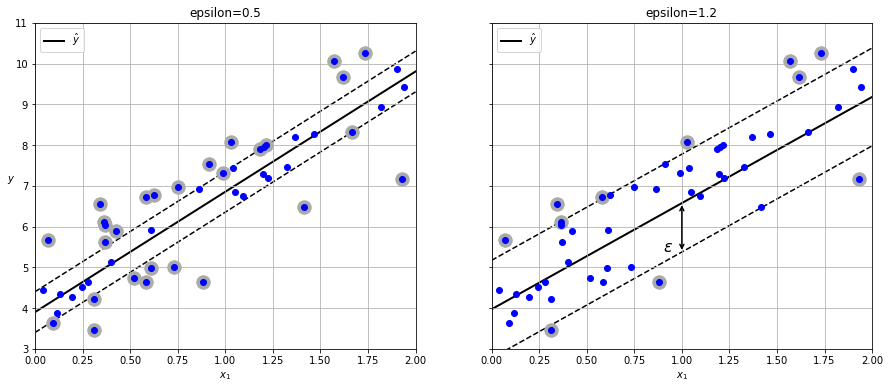

In [13]:
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    epsilon = svm_reg[-1].epsilon
    off_margin = np.abs(y - y_pred) >= epsilon
    return np.argwhere(off_margin)

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    epsilon = svm_reg[-1].epsilon
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$", zorder=-2)
    plt.plot(x1s, y_pred + epsilon, "k--", zorder=-2)
    plt.plot(x1s, y_pred - epsilon, "k--", zorder=-2)
    plt.scatter(X[svm_reg._support], y[svm_reg._support], s=180, facecolors='#AAa', zorder=-1)
    plt.plot(X, y, "bo")
    plt.xlabel("$x_1$")
    plt.legend(loc="upper left")
    plt.axis(axes)

svm_reg2 = make_pipeline(StandardScaler(),
                         LinearSVR(epsilon=1.2, random_state=42))
svm_reg2.fit(X, y)

svm_reg._support = find_support_vectors(svm_reg, X, y)
svm_reg2._support = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg2.predict([[eps_x1]])

fig, axes = plt.subplots(ncols=2, figsize=(15, 6), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg2[-1].epsilon}")
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg2[-1].epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.grid()
plt.text(0.90, 5.4, r"$\epsilon$", fontsize=16)
plt.show()

- Reducing ϵ increases the number of support vectors, which regularizes the model. 
- If you add more training instances within the margin, it will not affect the model’s predictions; thus, the model is said to be ϵ-insensitive.

<font size="5" color="red">Reference: Hands On Machine Learning with Scikit-Learn, Keras & Tensorflow </font>

### Hands-On

In [14]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

cancer = datasets.load_breast_cancer()

print("Features: ", cancer.feature_names)
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=109)

###